In [18]:

# Dependencies and Setup
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

from pprint import pprint
from census import Census
from us import states
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from config import key
from pandas.io.json import json_normalize 
from config import key
c = Census(key, year=2017)
c2 = Census(key, year=2011)


In [78]:
# Pull US Census Data for each State
census_data = c.acs1.get(("NAME", "B19013_001E"), {'for': 'state:*'})
census_income_2017 = pd.DataFrame(census_data)

census_income_2017 = census_income_2017.rename(columns={"B19013_001E": "2017 Median Income",
                                                        "NAME": "State",
                                                        "state": "Code"})
census_income_2017.head()

,2017 Median Income,State,Code
0,48123.0,Alabama,01
1,73181.0,Alaska,02
2,56581.0,Arizona,04
3,45869.0,Arkansas,05
4,71805.0,California,06


In [71]:
# dropping passed columns 
census_income_2017.drop(["Code"], axis = 1, inplace = True) 
  
# display 
census_income_2017.head()

,2017 Median Income,State
0,48123.0,Alabama
1,73181.0,Alaska
2,56581.0,Arizona
3,45869.0,Arkansas
4,71805.0,California


In [109]:
# Pull US Census Data for each State
census_data = c2.acs1.get(('NAME', 'B19013_001E'), {'for': 'state:*'})
census_income_2011 = pd.DataFrame(census_data)
  
census_income_2011 = census_income_2011.rename({'Median Census Income': '',
                                               'B19013_001E': '2011 Median Income', 
                                               'NAME': 'State',
                                               'state': 'Code'
                                               })
census_income_2011.head()

,B19013_001E,NAME,state
0,41415.0,Alabama,01
1,67825.0,Alaska,02
2,46709.0,Arizona,04
3,38758.0,Arkansas,05
4,57287.0,California,06


In [110]:
#census_income_2011.index.name
#census_income_2011.head()
#print(census_income_2011.index.name)#None
#print(census_income_2011.columns.name)
#print(census_income_2011.columns.name)None
#print(census_income_2011.index.names)[None]

In [111]:
census_income_merged = pd.merge(census_income_2011_1, census_income_2017, how="inner",on="State",suffixes=("_2011", "_2017"))
census_income_merged.head()

,State,2011 Median Income,2017 Median Income,Code
0,Alabama,41415.0,48123.0,01
1,Alaska,67825.0,73181.0,02
2,Arizona,46709.0,56581.0,04
3,Arkansas,38758.0,45869.0,05
4,California,57287.0,71805.0,06


In [112]:

#calculate %delata

pd.options.mode.chained_assignment = None  # default='warn'

census_income_delta = census_income_merged["Mdn Percent Income Change"]\
=round((((census_income_merged["2017 Median Income"]\
                                                           -census_income_merged["2011 Median Income"])\
                                                          /census_income_merged["2011 Median Income"])\
                                                         *100),2)


census_income_merged["Mdn Percent Income Change"]\
=census_income_merged["Mdn Percent Income Change"].astype(float)

census_income_merged=census_income_merged[["State","2011 Median Income", "2017 Median Income", "Mdn Percent Income Change"]]

census_income_merged.head()

,State,2011 Median Income,2017 Median Income,Mdn Percent Income Change
0,Alabama,41415.0,48123.0,16.20
1,Alaska,67825.0,73181.0,7.90
2,Arizona,46709.0,56581.0,21.14
3,Arkansas,38758.0,45869.0,18.35
4,California,57287.0,71805.0,25.34


In [114]:
census_income_merged = census_income_merged[census_income_merged.State != "Puerto Rico"]
census_income_merged.head()

,State,2011 Median Income,2017 Median Income,Mdn Percent Income Change
0,Alabama,41415.0,48123.0,16.20
1,Alaska,67825.0,73181.0,7.90
2,Arizona,46709.0,56581.0,21.14
3,Arkansas,38758.0,45869.0,18.35
4,California,57287.0,71805.0,25.34


In [115]:
sorteddf = census_income_merged.sort_values("Mdn Percent Income Change",ascending=False)

sorteddf['rank'] = sorteddf['Mdn Percent Income Change'].rank()
sorteddf.head()

,State,2011 Median Income,2017 Median Income,Mdn Percent Income Change,rank
8,District of Columbia,63124.0,82372.0,30.49,51.0
37,Oregon,46816.0,60212.0,28.61,50.0
11,Hawaii,61821.0,77765.0,25.79,49.0
4,California,57287.0,71805.0,25.34,48.0
47,Washington,56835.0,70979.0,24.89,47.0


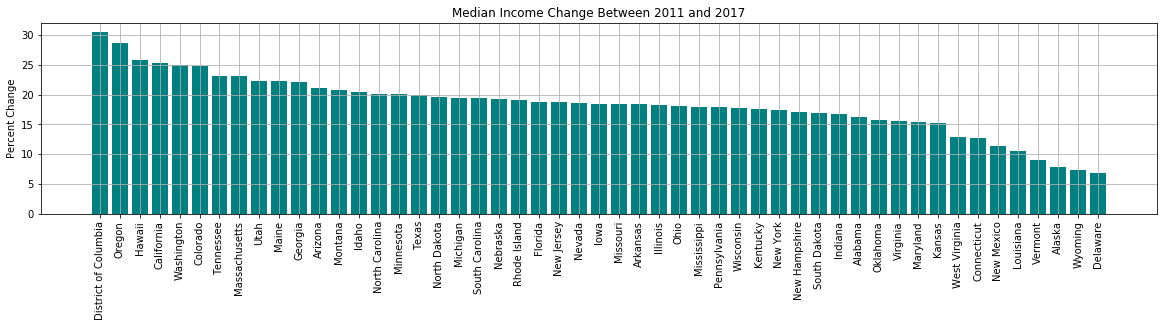

In [118]:
# # PLot Results
mdnincome11 = sorteddf["2011 Median Income"]
mdnincome17 = sorteddf["2011 Median Income"]
mdnincomepct = sorteddf["Mdn Percent Income Change"]
sorted_states = sorteddf["State"]
incomepct = sorteddf

fig,ax=plt.subplots(figsize=(20,5))
fig.subplots_adjust(bottom=0.35)
plt.bar(sorted_states, mdnincomepct, color='teal', alpha=1, align="center")
# plt.tight_layout()
plt.xticks(sorted_states, rotation='90')
plt.title("Median Income Change Between 2011 and 2017")
plt.ylabel("Percent Change")
plt.grid()
plt.show
plt.savefig('/Users/rebeccajbooth/Documents/Images/Median Income Change Between 2011 and 2017.png')

In [119]:
sorteddf.to_csv("/Users/rebeccajbooth/Documents/PythonStuff/Project_1_BESTSTATE/Median Census Income.csv", header=False, sep=';')
print(sorteddf.head(10))

                   State  2011 Median Income  2017 Median Income  \
8   District of Columbia             63124.0             82372.0   
37                Oregon             46816.0             60212.0   
11                Hawaii             61821.0             77765.0   
4             California             57287.0             71805.0   
47            Washington             56835.0             70979.0   
5               Colorado             55387.0             69117.0   
42             Tennessee             41693.0             51340.0   
21         Massachusetts             62859.0             77385.0   
44                  Utah             55869.0             68358.0   
19                 Maine             46033.0             56277.0   

    Mdn Percent Income Change  rank  
8                       30.49  51.0  
37                      28.61  50.0  
11                      25.79  49.0  
4                       25.34  48.0  
47                      24.89  47.0  
5                      